# Excercise 1
All our code for exercise 1.

### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Create the function
$f(x) = \frac{1}{x} - \log(x) + \log(2)$

In [2]:
def f(x):
    result = 1 / x - np.log(x) + np.log(2)
    return result

## 1.A.1 Plotting the function
A plot of the function $f(x)$, at the interval $[0.1, 20]$.

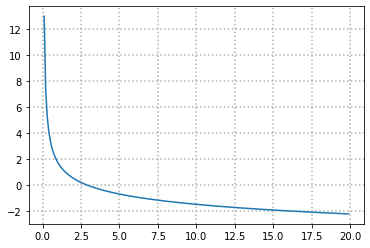

In [7]:
def plot():
    x = 0.1
    i = 0
    qq = np.empty(199)
    qr = np.empty(199)
    while x <= 20:
        qq[i] = f(x)
        qr[i] = x
        x += 0.1
        i += 1
    plt.plot(qr, qq)
    plt.grid(linestyle=":", linewidth=1.5)
    plt.show()


plot()

## 1.A.1 False Position Method
Below our implmentation of the False Position Method. We use the left boundry $a = 1$, and right boundry $b = 5$.

In [8]:
def false_position():
    left_boundry = 1
    right_boundry = 5
    iterations = 0

    left_boundry_array = np.empty(100)  # 100 bigger than max iteration
    right_boundry_array = np.empty(100)
    left_boundry_array[0] = left_boundry
    right_boundry_array[0] = right_boundry
    equals_zero = False
    width_interval_reached = False
    max_iterations_reached = False
    max_iterations = 50
    minimum_witdh = 0.000001
    acceptable_error = 0.00000001
    center = 0.0

    while (
        (not equals_zero)
        and (not width_interval_reached)
        and (not max_iterations_reached)
    ):
        iterations += 1
        center = (
            left_boundry * f(right_boundry) - right_boundry * f(left_boundry)
        ) / (f(right_boundry) - f(left_boundry))

        if abs(f(center)) < acceptable_error:
            equals_zero = True
        elif np.sign(f(center)) == np.sign(f(left_boundry)):
            left_boundry = center
        else:
            right_boundry = center
        left_boundry_array[iterations] = left_boundry
        right_boundry_array[iterations] = right_boundry
        if iterations == max_iterations:
            max_iterations_reached = True
        if right_boundry - left_boundry < minimum_witdh:
            width_interval_reached = True
    root = center
    print(
        f"{root=}\n{equals_zero=}\n{width_interval_reached=}\n{max_iterations_reached=}\n{left_boundry=}\n{right_boundry=}\n{iterations=}"
    )
    return root

false_position()

root=2.8430598827496514
equals_zero=True
width_interval_reached=False
max_iterations_reached=False
left_boundry=1
right_boundry=2.8430598945320167
iterations=26


2.8430598827496514

## 1.A.2 Bisection Method
Below our implementation of the Bisection Method, we use left boundry $a = 1$, and right boundry $b = 5$.

In [9]:
def bisection_method():
    left_boundry = 1
    right_boundry = 5
    iterations = 0

    left_boundry_array = np.empty(100)  # 100 bigger than max iteration
    right_boundry_array = np.empty(100)
    left_boundry_array[0] = left_boundry
    right_boundry_array[0] = right_boundry
    equals_zero = False
    width_interval_reached = False
    max_iterations_reached = False
    max_iterations = 50
    width_interval = 0.00000001
    acceptable_error = 0.00000001
    center = 0.0

    while (
        (not equals_zero)
        and (not width_interval_reached)
        and (not max_iterations_reached)
    ):
        iterations += 1
        center = left_boundry + (right_boundry - left_boundry) / 2

        if abs(f(center)) < acceptable_error:
            equals_zero = True
        elif np.sign(f(center)) == np.sign(f(left_boundry)):
            left_boundry = center
        else:
            right_boundry = center

        left_boundry_array[iterations] = left_boundry
        right_boundry_array[iterations] = right_boundry

        if iterations == max_iterations:
            max_iterations_reached = True

        if right_boundry - left_boundry < width_interval:
            width_interval_reached = True

    root = center
    print(
        f"{root=}\n{equals_zero=}\n{width_interval=}\n{max_iterations_reached=}\n{left_boundry=}\n{right_boundry=}\n{iterations=}"
    )
    return root

bisection_method()

root=2.843059867620468
equals_zero=True
width_interval=1e-08
max_iterations_reached=False
left_boundry=2.8430598378181458
right_boundry=2.8430598974227905
iterations=27


2.843059867620468

## 1.A.3 Modified False Position
Below our implementation of the Modified False Position, we use left boundry $a = 1$, $b = 5$.

In [10]:
def modified_false_position():
    left_boundry = 1
    right_boundry = 5
    iteration = 0

    counter_left_boundry_used = 0
    counter_right_boundry_used = 0

    left_boundry_array = np.empty(100)  # 100 bigger than max iteration
    right_boundry_array = np.empty(100)
    left_boundry_array[0] = left_boundry
    right_boundry_array[0] = right_boundry

    equals_zero = False
    width_interval_reached = False
    max_iterations_reached = False
    max_iterations = 50
    width_interval = 0.000001
    acceptable_error = 0.00000001
    center = 0.0

    while (
        (not equals_zero)
        and (not width_interval_reached)
        and (not max_iterations_reached)
    ):
        iteration += 1
        if counter_left_boundry_used == 2 or counter_right_boundry_used == 2:
            if f(left_boundry) * f(right_boundry) > 0:
                center = (
                    left_boundry * f(right_boundry)
                    - 2 * right_boundry * f(left_boundry)
                ) / (f(right_boundry) - 2 * f(left_boundry))
            else:
                center = (
                    2 * left_boundry * f(right_boundry)
                    - right_boundry * f(left_boundry)
                ) / (2 * f(right_boundry) - f(left_boundry))
        else:
            center = (
                left_boundry * f(right_boundry)
                - right_boundry * f(left_boundry)
            ) / (f(right_boundry) - f(left_boundry))

        if abs(f(center)) < acceptable_error:
            equals_zero = True
        elif np.sign(f(center)) == np.sign(f(left_boundry)):
            left_boundry = center
            counter_right_boundry_used += 1
            counter_left_boundry_used = 0
        else:
            right_boundry = center
            counter_left_boundry_used += 1
            counter_right_boundry_used = 0

        left_boundry_array[iteration] = left_boundry
        right_boundry_array[iteration] = right_boundry
        if iteration == max_iterations:
            max_iterations_reached = True

        if right_boundry - left_boundry < width_interval:
            width_interval_reached = True

    root = center
    print(
        f"{root=}\n{equals_zero=}\n{width_interval_reached=}\n{max_iterations_reached=}\n{left_boundry=}\n{right_boundry=}\n{iteration=}"
    )
    return root

modified_false_position()

root=2.8430598917613343
equals_zero=True
width_interval_reached=False
max_iterations_reached=False
left_boundry=1
right_boundry=2.843059913210903
iteration=22


2.8430598917613343

## 1.A.4 Findings

Findings here